# CC3001 Otoño 2023 Tarea  [Nicolás Arancibia]

# Calculadora

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Enunciado

Esta tarea consiste en desarrollar una calculadora de expresiones matemáticas al estilo Matlab o Maple, pero con capacidad de procesar un conjunto de comandos bien restringido. Algunos ejemplos de los comandos que acepta y de lo que debe imprimir en la salida van a continuación:

|Entrada (lo que el usuario escribe)   | Salida(lo que imprime el programa)  |
|---|---|
|n=5   | 5  |
|hanoi=2^n-1    |31   |
|var_1 = 23 - 13 + hanoi * 2    |82   |
|h2 = hanoi /2   |15   |
|n   |5   |

A continuación definimos más en detalle lo que se debe implementar:



1.   Cada comando es de la forma "variable=expresión". El efecto es que se debe calcular la expresión de la derecha, guardar el resultado en la variable de la izquierda e imprimir el resultado en la salida. Si se omite desde el "=" hacia adelante (como en el último ejemplo), solo se imprime el valor de la variable. Las variables comienzan con letra y continúan con letras, dígitos y el signo "_".
2.   Los operadores permitidos son "+","-","*", "/", "^".
3.   Solo se trabaja con números enteros y todas las operaciones dan resultado entero (incluyendo la división, que trunca).
4.   Para simplificar, no se puede usar paréntesis y la expresión se evalúa estrictamente de izquierda a derecha. Eso explica el resultado que se obtiene para "var_1".
5.   Si se utiliza una variable que aún no ha sido definida, se debe dar un error

      ERROR: variable indefinida "..."

6.   Si la sintaxis no es correcta, se debe imprimir en la salida un mensaje de la forma

      ERROR: al procesar "..."

      donde el string que se imprime es la parte de la entrada desde el punto del error hacia adelante.


Antes de empezar a escribir código, usted debe dibujar un diagrama de estados que describa la estructura de la entrada. Si le resulta más conveniente, pueden ser varios diagramas (por ejemplo, uno que describa la estructura de una variable, otro la de un número, otra la de un comando). Luego, a partir de ahí escriba el código que implementa esos diagramas. **Importante:** Su código debe ir procesando de un caracter a la vez, para este procesamiento no se puede utilizar funciones de Python que operen sobre strings de largo mayor que uno. Se recomienda tener una función que reciba un comando en un string y lo procese, y otra que se encargue de ir leyendo líneas una a una e invocando a la función antes mencionada para procesarlas.

Para almacenar los nombres y valores de las variables, está permitido el uso de un diccionario de Python.

En su entrega debe describir brevemente el problema, luego describir la estrategia de solución a través de los diagramas de estados, y a continuación el código ejecutable respectivo, agregando todas las explicaciones necesarias para que se entienda.



El problema a tratar es como procesar el comando proveniente de la función calculadora, el procesador de comandos tiene que identificar que elementos corresponden a una variable y que elementos corresponden a una expresión, esto mediante el uso de estados dentro del mismo procesador. De esta forma se definen las variables introducidas junto con su expresión asociadas para introducirlas a un diccionario de variables, y si dentro de la misma expresión se llama a otra variable, el procesador debe identificar si esta variable se encuentra o no dentro del diccionaio definido, si efectivamente se encuentra esta variable en el diccionario, el procesador continúa con los siguientes elementos, en cambio, si no está la variable dentro del diccionario, el procesador deja de estudiar los siguientes elementos, rompiendo con la iteración y dar a entender que la variable la cual fue llamada no existe en el diccionario.

A continuación se puede apreciar el diagrama de estados que describe el funcionamiento del procesador de comandos de la calculadora:
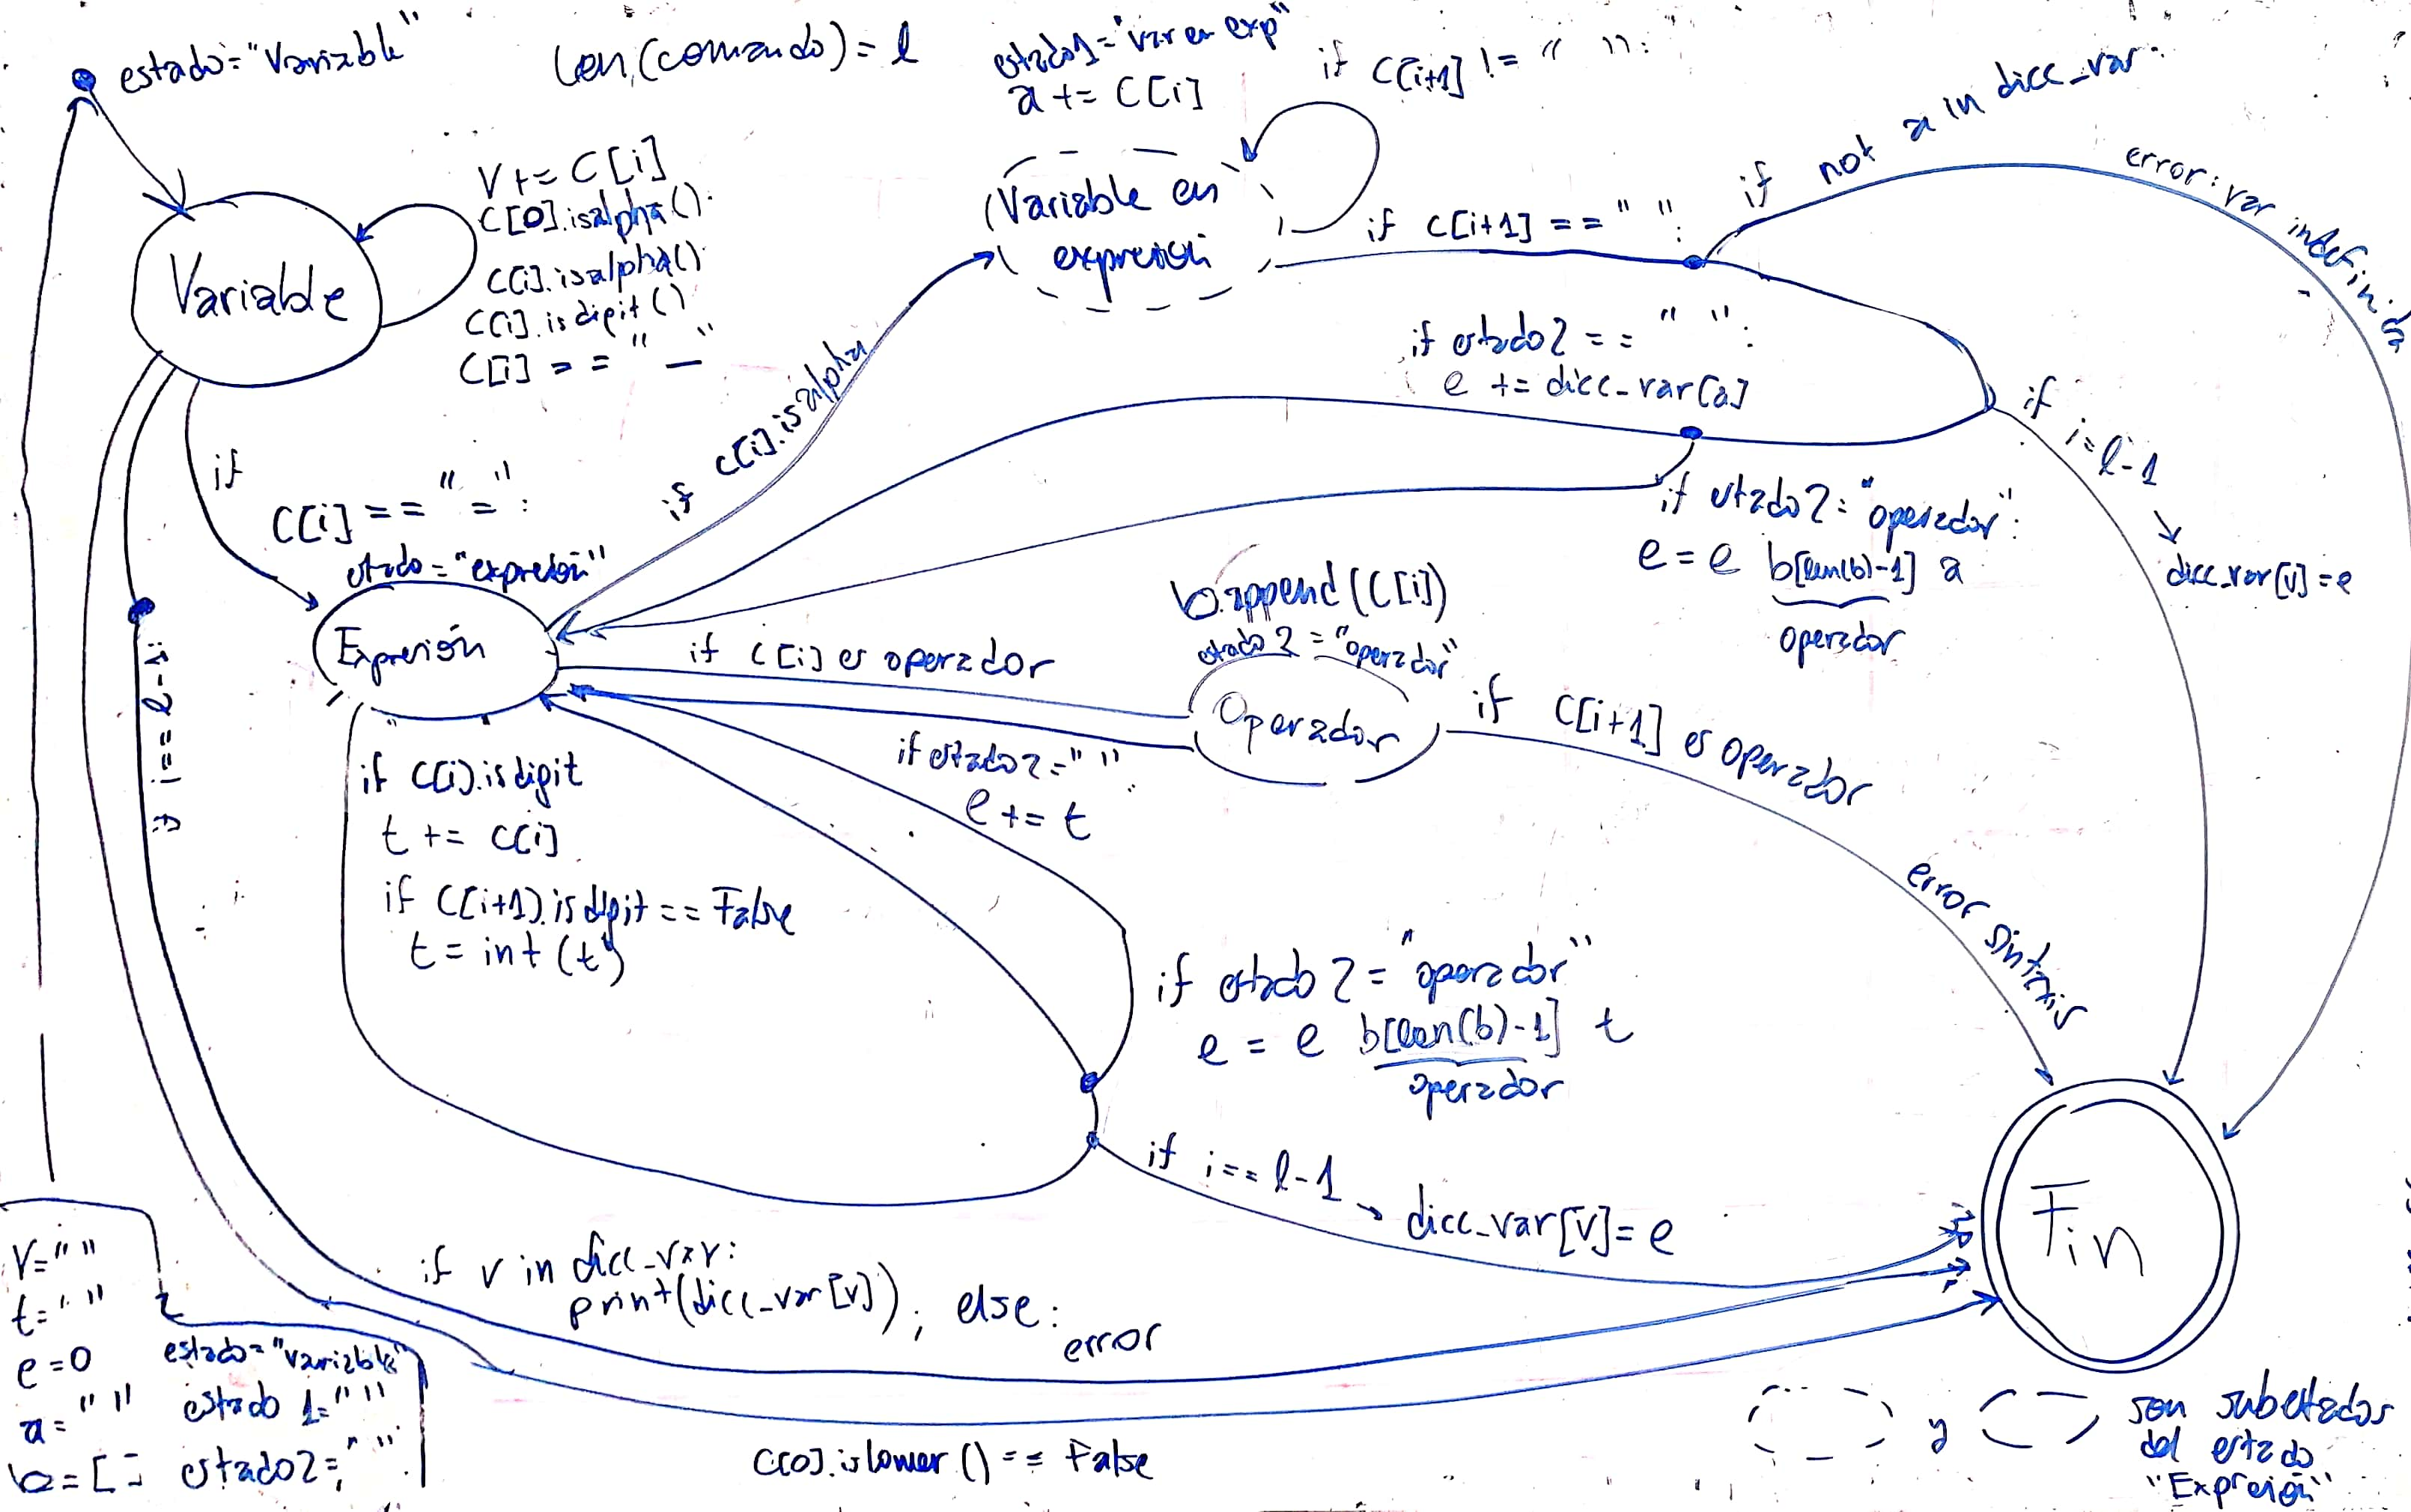

In [1]:
# Esta función recibe un comando en string y el diccionario de variables. Con él,
# procesa el comando, imprime el resultado de la expresion
# y posiblemente modifica el diccionario. La función retorna el diccionario

def procesar_comando(comando, dicc_var):
  # procesa el comando e imprime el resultado
  estado = "VARIABLE" #se asume como primer elemento del comando como variable
  estado1 = ""
  estado2 = ""

  # v guardará todos los elementos que corresponden a las variables
  v = ""
  # e guardará la expresión a la que corresponde la variable en el comando
  e = 0
  # a guardará las variables una vez se esté procesando la expresión de una variable
  a = ""
  # t guardará los elementos que correspondan a números tales que no sean parte de una variable
  t = ""
  # b será una lista que guardará los operadores en una expresión
  b = []
  for i in range(0,len(comando)):
    # la variable siempre empieza con una letra, de lo contrario no hay variable y hay error de sintaxis
    if comando[0] == "=" or comando[0].isdigit() == True or comando[0] == "_":
        print("ERROR: al procesar" + " " + comando[0])
        break
    # si el elemento es un espacio
    if comando[i] == " ":
      if estado == "VARIABLE":
        if i == len(comando) - 1:
          print(dicc_var[v])
          break
        if comando[i+1].isdigit() == True or comando[i+1].isalpha() == True or comando[i+1] == "_":
         print("ERROR: al procesar" + " " + v)
    # si el elemento es _
    if comando[i] == "_":
      if estado == "VARIABLE":
        v += comando[i]
        if i == len(comando) - 1:
         if v in dicc_var:
           print(dicc_var[v])
         else:
           print("ERROR: variable indefinida"+ " " + v)
           break
      if estado == "EXPRESION":
        if estado1 == "VARIABLE_EN_EXPRESION":
         a += comando[i]
         if i == (len(comando)-1):
          if not (a in dicc_var):
            print("ERROR: variable indefinida"+ " " + a)
            break
          else:
            if estado2 == "OPERADOR":
             if b[len(b)-1] == "^":
              e = e**dicc_var[a]
              dicc_var[v] = e
              print(dicc_var[v])
             if b[len(b)-1] == "+":
              e = e + dicc_var[a]
              dicc_var[v] = e
              print(dicc_var[v])
             if b[len(b)-1] == "-":
              e = e - dicc_var[a]
              dicc_var[v] = e
              print(dicc_var[v])
             if b[len(b)-1] == "*":
              e = e * dicc_var[a]
              dicc_var[v] = e
              print(dicc_var[v])
             if b[len(b)-1] == "/":
              e = int(e / dicc_var[a])
              dicc_var[v] = e
              print(dicc_var[v])
         else:
           if comando[i+1].isalpha() == False and comando[i+1].isdigit() == False and comando[i+1] != "_":
             if not (a in dicc_var):
               print("ERROR: variable indefinida"+ " " + a)
               break

             else:
              if estado2 == "OPERADOR":
               if b[len(b)-1] == "^":
                e = e**dicc_var[a]
                dicc_var[v] = e
                print(dicc_var[v])
               if b[len(b)-1] == "+":
                e = e + dicc_var[a]
                dicc_var[v] = e
                print(dicc_var[v])
               if b[len(b)-1] == "-":
                e = e - dicc_var[a]
                dicc_var[v] = e
                print(dicc_var[v])
               if b[len(b)-1] == "*":
                e = e * dicc_var[a]
                dicc_var[v] = e
                print(dicc_var[v])
               if b[len(b)-1] == "/":
                e = int(e / dicc_var[a])
                dicc_var[v] = e
                print(dicc_var[v])
        else:
         a += comando[i]
         print("ERROR: variable indefinida"+ " " + a)
         break
    # si el elemento es letra
    if comando[i].isalpha() == True:
      if estado == "VARIABLE":
       v += comando[i]
       if i == len(comando) - 1:
         if v in dicc_var:
           print(dicc_var[v])
         else:
           print("ERROR: variable indefinida"+ " " + v)
           break
      if estado == "EXPRESION":
        estado1 = "VARIABLE_EN_EXPRESION"
        a += comando[i]
        if i == (len(comando)-1):
          if not (a in dicc_var):
            print("ERROR: variable indefinida"+ " " + a)
            break
          else:
            if estado2 == "OPERADOR":
             if b[len(b)-1] == "^":
              e = e**dicc_var[a]
              dicc_var[v] = e
              print(dicc_var[v])
             if b[len(b)-1] == "+":
              e = e + dicc_var[a]
              dicc_var[v] = e
              print(dicc_var[v])
             if b[len(b)-1] == "-":
              e = e - dicc_var[a]
              dicc_var[v] = e
              print(dicc_var[v])
             if b[len(b)-1] == "*":
              e = e * dicc_var[a]
              dicc_var[v] = e
              print(dicc_var[v])
             if b[len(b)-1] == "/":
              e = int(e / dicc_var[a])
              dicc_var[v] = e
              print(dicc_var[v])

        else:

         if comando[i+1].isalpha() == False and comando[i+1].isdigit() == False and comando[i+1] != "_":
          if not (a in dicc_var):
            print("ERROR: variable indefinida"+ " " + a)
            break
          else:
            estado1 = ""
            if estado2 == "OPERADOR":
             if b[len(b)-1] == "^":
              e = e**dicc_var[a]
              dicc_var[v] = e
              a = ""
             if b[len(b)-1] == "+":
              e = e + dicc_var[a]
              a = ""
             if b[len(b)-1] == "-":
              e = e - dicc_var[a]
              a = ""
             if b[len(b)-1] == "*":
              e = e * dicc_var[a]
              a = ""
             if b[len(b)-1] == "/":
              e = int(e / dicc_var[a])
              a = ""
            else:
              estado1 = ""
              e = e + dicc_var[a]

    # si el elemento es =
    if comando[i] == "=":
      estado = "EXPRESION"
      if i == len(comando) - 1:
        print("ERROR: al procesar" + " " + comando[i])
        break
      else:
        if comando[i+1] == "=" or comando[i+1] == "+" or comando[i+1] == "-" or comando[i+1] == "*" or comando[i+1] == "/":
          print("ERROR: al procesar" + " " + comando[i] + comando[i+1])
    # si el elemento es numero
    if comando[i].isdigit() == True:
      if estado == "VARIABLE":
        v += comando[i]
        if i == len(comando) - 1:
          if v in dicc_var:
            print(dicc_var[v])
          else:
            print("ERROR: variable indefinida"+ " " + v)
            break



      if estado == "EXPRESION" and (not estado2 == "OPERADOR"):
        if estado1 == "VARIABLE_EN_EXPRESION":
          a += comando[i]
          if i == len(comando) - 1:
           if not (a in dicc_var):
            print("ERROR: variable indefinida"+ " " + a)
            break
           else:
             e += dicc_var[a]
             estado1 = ""
          else:
            if comando[i+1].isalpha() == False and comando[i+1].isdigit() == False:
              if not (a in dicc_var):
                print("ERROR: variable indefinida"+ " " + a)
                break
              else:
                e += dicc_var[a]
                estado1 = ""
        else:
         t += comando[i]
         if i == (len(comando)-1):
          t = int(t)
          e += t
          dicc_var[v] = e
          print(dicc_var[v])
          t = ""
         else:
          if comando[i+1].isdigit() == False:
            t = int(t)
            e += t
            t = ""
      if estado == "EXPRESION" and estado2 == "OPERADOR":
       if estado1 == "VARIABLE_EN_EXPRESION":
         a += comando[i]
         if i == len(comando) - 1:
           if not (a in dicc_var):
                print("ERROR: variable indefinida"+ " " + a)
                break
           else:
             estado1 = ""
             if b[len(b)-1] == "^":
              e = e**dicc_var[a]
              dicc_var[v] = e
              a = ""
             if b[len(b)-1] == "+":
              e = e + dicc_var[a]
              a = ""
             if b[len(b)-1] == "-":
              e = e - dicc_var[a]
              a = ""
             if b[len(b)-1] == "*":
              e = e * dicc_var[a]
              a = ""
             if b[len(b)-1] == "/":
              e = int(e / dicc_var[a])
              a = ""
         else:
            if comando[i+1].isalpha() == False and comando[i+1].isdigit() == False:
              if not (a in dicc_var):
                print("ERROR: variable indefinida"+ " " + a)
                break
              else:
               estado1 = ""
               if b[len(b)-1] == "^":
                e = e**dicc_var[a]
                dicc_var[v] = e
                a = ""
               if b[len(b)-1] == "+":
                e = e + dicc_var[a]
                a = ""
               if b[len(b)-1] == "-":
                e = e - dicc_var[a]
                a = ""
               if b[len(b)-1] == "*":
                e = e * dicc_var[a]
                a = ""
               if b[len(b)-1] == "/":
                e = int(e / dicc_var[a])
                a = ""
       else:
        t += comando[i]
        if i == (len(comando)-1):
          t = int(t)
          if b[len(b)-1] == "^":
            e = e**t
            dicc_var[v] = e
            print(dicc_var[v])
            t = ""
          if b[len(b)-1] == "+":
            e = e + t
            dicc_var[v] = e
            print(dicc_var[v])
            t = ""
          if b[len(b)-1] == "-":
            e = e - t
            dicc_var[v] = e
            print(dicc_var[v])
            t = ""
          if b[len(b)-1] == "*":
            e = e * t
            dicc_var[v] = e
            print(dicc_var[v])
            t = ""
          if b[len(b)-1] == "/":
            e = int(e / t)
            dicc_var[v] = e
            print(dicc_var[v])
            t = ""
        else:
          if comando[i+1].isdigit() == False:
            t = int(t)
            if b[len(b)-1] == "^":
             e = e**t
             t = ""
            if b[len(b)-1] == "+":
             e = e + t
             t = ""
            if b[len(b)-1] == "-":
             e = e - t
             t = ""
            if b[len(b)-1] == "*":
             e = e * t
             t = ""
            if b[len(b)-1] == "/":
             e = int(e / t)
             t = ""

    # si el elemento es un operador
    if comando[i] == "^" or comando[i] == "-" or comando[i] == "+" or comando[i] == "*" or comando[i] == "/":
     if estado == "VARIABLE":
      print("ERROR: al procesar" + " " + comando[i])
      break
     estado2 = "OPERADOR"
     b.append(comando[i])
     if i == len(comando) - 1:
        print("ERROR: al procesar" + " " + comando[i])
        break
     else:
        if comando[i+1] == "^" or comando[i+1] == "-" or comando[i+1] == "+" or comando[i+1] == "*" or comando[i+1] == "/":
          print("ERROR: al procesar" + " " + comando[i] + comando[i+1])
          break




  return dicc_var

def calculadora(lista_comandos):
  # Este diccionario almacena las variables que se vayan definiendo en la calculadora
  # Este diccionario se inicializa cuando se usa la calculadora
  vars = dict()

  # Se procesan todos los comandos de la lista (lista de string)
  for i in range(0, len(lista_comandos)):
    vars = procesar_comando(lista_comandos[i], vars)


## Ejemplo 1

In [2]:

# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi * 2","h2 = hanoi /2","","n"]
calculadora(lista)


5
31
82
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

   5

   31

   82

   15

   5



## Ejemplo 2

In [ ]:
# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi2 * 2","h2 = hanoi /2","","n"]
calculadora(lista)

5
31
ERROR: variable indefinida hanoi2
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

5

31

ERROR: variable indefinida "hanoi2"

15

5

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.